<a href="https://colab.research.google.com/github/09263/Soccar_Player_Goal_Kick_Text_Summarization_Project/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

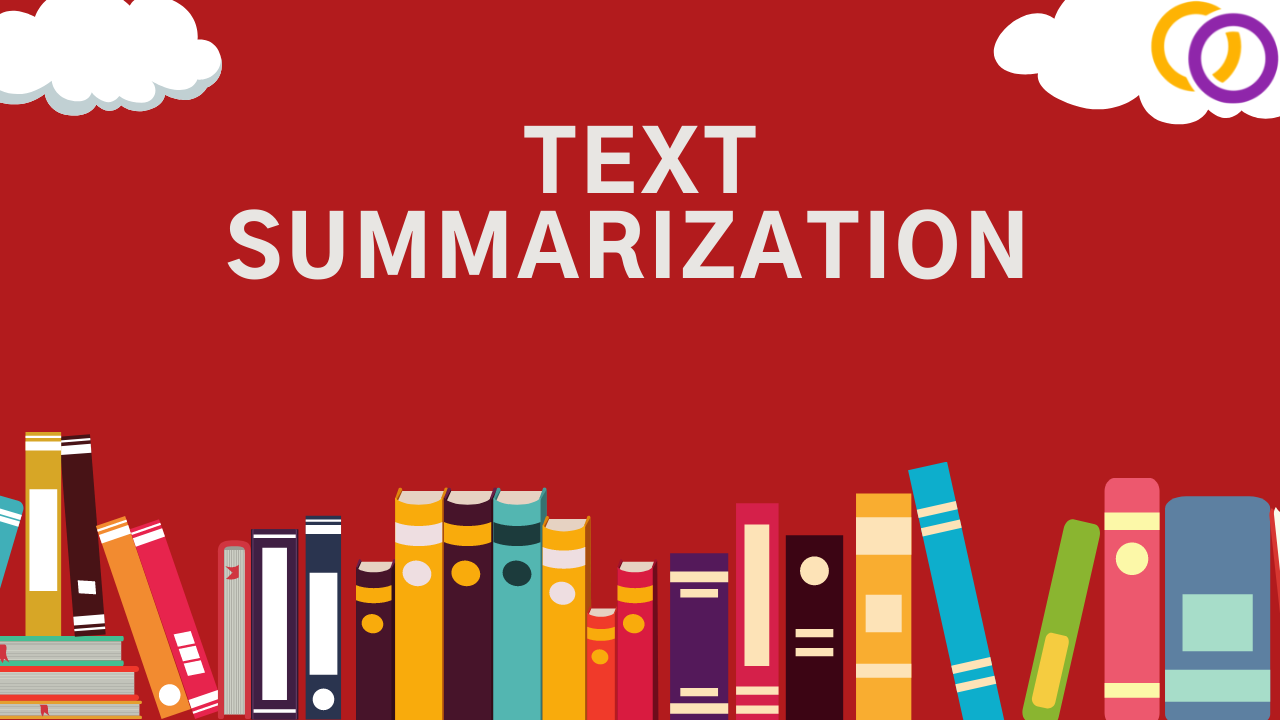

Text SUmmarization:

 - Abstractive Summarization
 - Extractive Summarization

In [ ]:
!pip install transformers

In [ ]:
import requests
from transformers import AutoTokenizer

import nltk
nltk.download("stopwords")
nltk.download("punkt")
import re
import string

from gensim.models import word2vec
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.tokenize import word_tokenize as nltk_word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
import numpy as np
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine

In [ ]:
def fetch_and_save_wiki(title):
  response = requests.get(
      "https://en.wikipedia.org/w/api.php",

params = {"action":"query",
          "format":"json",
          "titles":title,
          "prop":"extracts",
          "explaintext": True
}
  ).json()

  page = next(iter(response["query"]["pages"].values()))
  wiki_text = page["extract"]

  return wiki_text


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def clean_text(text):
  text = re.sub(r'[A-Za-z0-9\s.\(\)[\]{\}]+','',text)
  text = text.lower()
  text = " ".join(text.split())
  return text

In [ ]:
def count_tokens(text):
    tokens = tokenizer.encode(text , add_special_tokens = True)
    return(len(tokens))

In [ ]:
soccar_player =[
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Ronaldo",
    "Zinedine Zidane",
    "Ronaldinho",
    "Robert Lewandowski",
    "Lothar Matthäus",
    "Marco van Basten",
    "Roberto Baggio",
    "Romário",
    "George Weah",
    "Rivaldo",
    "Luís Figo",
    "Fabio Cannavaro",
    "Kaká",
    "Luka Modrić"
]

data = []

for player in soccar_player:
  info = fetch_and_save_wiki(player)
  tokens = tokenizer.encode(info , add_special_tokens = True , truncation = True , max_length = 30000)
  num_tokens = len(tokens)
  data.append([player , info , num_tokens])

#data


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data , columns = ["soccar_player" , "player_information" , "num_tokens"])
df.head()

,soccar_player,player_information,num_tokens
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833


In [ ]:
df["player_information_cleaned"] = df['player_information'].apply(clean_text)

In [ ]:
df["cleaned_token_player"] = df["player_information_cleaned"].apply(count_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (1167 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020,"é"""":ˈˈɾˈ;,',,',,-,,,,é,,-,,,,–;,,'',–,,'-,',,–...",1167
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467,":ɾʃˈɐʁɔˈ;,',',,,,,,,,,,,,,,,;,'-€£,é,--',,-,'-...",2709
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578,"-,-====:======,íá,,,,,""ú"",,,,–,,,,,,,,,,,,,,,ã...",84
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792,":é;:;,,,,,,,,,,',,,,€,,,,-',,,-,-,,'é,,,'',,,,...",1509
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833,",ú:ʁˈʒĩɲɡˈʃ,,',é,,,',,,-,,,-,,-""""""""ê,,-,––,,,,...",1406


In [ ]:
# df.to_csv("world_soccar_player.csv")

In [ ]:
# Sentence tokenization

def sent_tokenize(text):
  sents = nltk_sent_tokenize(text)

  sent_filtered = []

  for s in sents:
    sent_filtered.append(s)
  return sent_filtered

In [ ]:
# Clean sentence function

# Clean sentence function

def cleanup_sentences(text):
  stop_words = set(stopwords.words("english"))
  sentences = sent_tokenize(text)

  sentences_cleaned = []

  for sent in sentences:
    words = nltk_word_tokenize(sent)
    words = [w for w in words if w not in string.punctuation]
    words = [w for w in words if not w.lower() in stop_words]
    words = [w.lower() for w in words]
    sentences_cleaned.append(" ".join(words))

  return sentences_cleaned

In [ ]:
df["cleaned_sentences"] = df["player_information_cleaned"].apply(cleanup_sentences)

In [ ]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020,"é"""":ˈˈɾˈ;,',,',,-,,,,é,,-,,,,–;,,'',–,,'-,',,–...",1167,"[é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '- ..."
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467,":ɾʃˈɐʁɔˈ;,',',,,,,,,,,,,,,,,;,'-€£,é,--',,-,'-...",2709,"[ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó -..."
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578,"-,-====:======,íá,,,,,""ú"",,,,–,,,,,,,,,,,,,,,ã...",84,"[-==== ====== íá '' ú '' ,– ã ====== ,í– ,====..."
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792,":é;:;,,,,,,,,,,',,,,€,,,,-',,,-,-,,'é,,,'',,,,...",1509,"[é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć ..."
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833,",ú:ʁˈʒĩɲɡˈʃ,,',é,,,',,,-,,,-,,-""""""""ê,,-,––,,,,...",1406,"[ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– —— ..."


In [ ]:
# df["cleaned_sentences"][0]

In [ ]:
# TFIDF:

def get_tf_idf(sentences):
    vectorizer = CountVectorizer()
    sent_word_matrix = vectorizer.fit_transform(sentences)

    transformer = TfidfTransformer(norm = None , sublinear_tf= False , smooth_idf = False)
    tfidf = transformer.fit_transform(sent_word_matrix)
    tfidf = tfidf.toarray()

    # Calculate the centroid vector
    centroid_vector = tfidf.sum(axis = 0)
    centroid_vector = np.divide(centroid_vector , centroid_vector.max())

    feature_names = vectorizer.get_feature_names_out()

    relevant_vector_indices = np.where(centroid_vector > 0.3)[0]

    word_list = [feature_names[idx] for idx in relevant_vector_indices]

    return word_list


In [ ]:
df["most_important_words"] = df["cleaned_sentences"].apply(get_tf_idf)

In [ ]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020,"é"""":ˈˈɾˈ;,',,',,-,,,,é,,-,,,,–;,,'',–,,'-,',,–...",1167,"[é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '- ...","[àé, éè, éé, ˈˈɾˈ]"
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467,":ɾʃˈɐʁɔˈ;,',',,,,,,,,,,,,,,,;,'-€£,é,--',,-,'-...",2709,"[ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó -...","[áé, áóöö, ãé, çâ, çãóçã, éè, éñ, éó, óã, šć, ..."
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578,"-,-====:======,íá,,,,,""ú"",,,,–,,,,,,,,,,,,,,,ã...",84,"[-==== ====== íá '' ú '' ,– ã ====== ,í– ,====...",[íá]
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792,":é;:;,,,,,,,,,,',,,,€,,,,-',,,-,-,,'é,,,'',,,,...",1509,"[é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć ...","[éá, éã, éé, ééé, éñ, ñç, óá, žšć]"
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833,",ú:ʁˈʒĩɲɡˈʃ,,',é,,,',,,-,,,-,,-""""""""ê,,-,––,,,,...",1406,"[ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– —— ...","[áã, áñá, ãç, çã, çãé, çõ, éé, ʁˈʒĩɲɡˈʃ]"


In [ ]:
# df['most_important_words'][1]

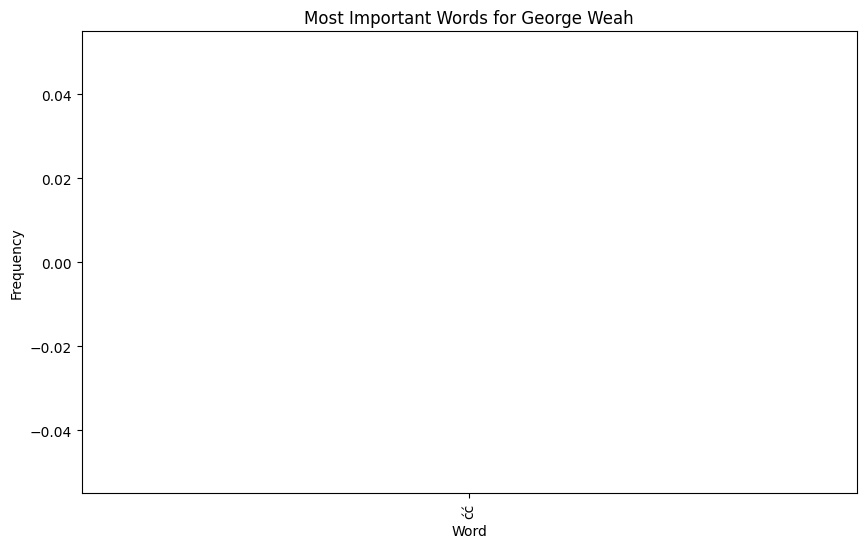

In [ ]:
import matplotlib.pyplot as plt

def plot_important_words(df, player_index):
  important_words = df['most_important_words'][player_index]
  plt.figure(figsize=(10, 6))
  plt.bar(important_words, range(len(important_words)))
  plt.xticks(rotation='vertical')
  plt.xlabel('Word')
  plt.ylabel('Frequency')
  plt.title(f"Most Important Words for {df['soccar_player'][player_index]}")
  plt.show()

# Plot the most important words for the first player
plot_important_words(df, 10)


In [ ]:
def word_vector_cache(sentences , embedding_model):
  word_vectors = dict()
  for sent in sentences:
    words = nltk_word_tokenize(sent)
    for w in words:
      word_vectors.update({w: embedding_model.wv[w]})
    return word_vectors

In [ ]:
def build_embedding_representation(words , word_vectors , embedding_model):
  embedding_representation = np.zeros(embedding_model.vector_size , dtype = 'float32')
  word_vector_key = set(word_vectors.keys())

  count = 0
  for w in words:
    if w in word_vector_key:
      embedding_representation = embedding_representation + word_vectors[w]
      count += 1

  if count !=0:
    embedding_representation = np.divide(embedding_representation , count)

  return embedding_representation


In [ ]:
def similarity(v1 , v2):
  score = 0.0
  if np.count_nonzero(v1) != 0 and np.count_nonzero(v2) != 0:
    score = ((1 - cosine(v1,v2)) + 1) / 2
  return score

In [ ]:
def summarize(text , embedding_model):
  raw_sentences = sent_tokenize(text)
  clean_sentences = cleanup_sentences(text)

  for i , s in enumerate(raw_sentences):
    print(i , s)

  for i , s in enumerate(clean_sentences):
    print(i ,s)


  centroid_words = get_tf_idf(clean_sentences)
  print(len(centroid_words) , centroid_words)

  word_vectors = word_vector_cache(clean_sentences , embedding_model)

  # Centroid embedding representation

  centroid_vectors = build_embedding_representation(centroid_words , word_vectors ,embedding_model)
  sentences_score = []

  for i in range(len(clean_sentences)):
    score = []
    words = clean_sentences[i].split()

    #sentence embedding representation
    sentence_vector = build_embedding_representation(words ,word_vectors , embedding_model )

    # Cosine similarity between sentence vector and centroid vector

    score = similarity(sentence_vector , centroid_vectors)
    sentences_score.append((i , raw_sentences[i] , score , sentence_vector))

    sentences_score_sort = sorted(sentences_score , key = lambda el: el[2] , reverse = True)

    for s in sentences_score_sort:
      print(s[0] , s[1] , s[2])

    count = 0
    sentence_summary = []

    for s in sentences_score_sort:
      if count > 100:
        break
      include_flag = True

      for ps in sentence_summary:
        sim = similarity(s[3] , ps[3])
        if sim > 0.95:
          include_flag = False

      if include_flag:
        sentence_summary.append(s)
        count += len(s[1].split())


      sentence_summary = sorted(sentence_summary , key = lambda el: el[0] , reverse = False)

    summary = "\n".join(s[1] for s in sentence_summary)
    print(summary)

    return summary

In [ ]:
df['cleaned_sentences'] = df['cleaned_sentences'].astype(str)

In [ ]:
sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]

In [ ]:
!pip install gensim

In [ ]:
import gensim

In [ ]:
# sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]
model = gensim.models.Word2Vec(sentences , min_count = 1 , sg = 1)

In [ ]:
df["summary"] = df["cleaned_sentences"].apply(lambda x:summarize(x , model))

0 ["é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '- '- '- ==== -- '' '' ,í '' '' '' '' í ,àé '' '' '-– – á ,àé ================== -- – – ,-á ,– – – – ,á– '- é ñ ,'– ,'– ,– ñ '' -- – '- -- '- ü '========== ó '' '' '' '' '' '' '' ,é -- ,-'–– ––– –– á -- ====== -- '' ç '' éé ç'- é '' '' '' '' é '' '' ,ó '' '' '' '' '' '' ====== ,– – – '' '' –+⁄–'-'–– á ,===='- € € €–€ €'- –€ € '- '- €€ € '' '- '' '' ō ,– '' '' ,á '' '' '' ========== – '– ,í '' '' ====== '' '' '' ó€ ,éè€ é £ é —— '- '' ,ú '' é '' ======'€ ,€ -€€ '' '' ==================== – – – – – – – – – – – – – – – – –ñ :– – – – – –é é – '/ :– – – – – – :– – – – – – – – –é ,é :– – – – – – – – – − – − – − – – – ,================ -- ––"]
0 `` é `` `` ˈˈɾˈ é – `` – '- – '- '- éé é '- '- '- ==== -- `` `` í `` `` `` `` í àé `` `` '-– – á àé ================== -- – – -á – – – – á– '- é ñ '– '– – ñ `` -- – '- -- '- ü '========== ó `` `` `` `` `` `` `` é -- -'–– ––– –– á -- ====== -- `` ç `` éé ç'- é `` `` `` `` é `` `` ó `` `` `` `` `` `` ====== 

In [ ]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words,summary
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020,"é"""":ˈˈɾˈ;,',,',,-,,,,é,,-,,,,–;,,'',–,,'-,',,–...",1167,"[""é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '-...","[àé, éè, éé, ˈˈɾˈ]","[""é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '-..."
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467,":ɾʃˈɐʁɔˈ;,',',,,,,,,,,,,,,,,;,'-€£,é,--',,-,'-...",2709,"[""ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó ...","[áé, áóöö, ãé, çâ, çãóçã, éè, éñ, éó, óã, šć, ...","[""ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó ..."
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578,"-,-====:======,íá,,,,,""ú"",,,,–,,,,,,,,,,,,,,,ã...",84,"[""-==== ====== íá '' ú '' ,– ã ====== ,í– ,===...",[íá],"[""-==== ====== íá '' ú '' ,– ã ====== ,í– ,===..."
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792,":é;:;,,,,,,,,,,',,,,€,,,,-',,,-,-,,'é,,,'',,,,...",1509,"[""é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć...","[éá, éã, éé, ééé, éñ, ñç, óá, žšć]","[""é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć..."
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833,",ú:ʁˈʒĩɲɡˈʃ,,',é,,,',,,-,,,-,,-""""""""ê,,-,––,,,,...",1406,"[""ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– ——...","[áã, áñá, ãç, çã, çãé, çõ, éé, ʁˈʒĩɲɡˈʃ]","[""ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– ——..."


In [ ]:
df["summary_token"] = df["summary"].apply(count_tokens)

In [ ]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words,summary,summary_token
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",9020,"é"""":ˈˈɾˈ;,',,',,-,,,,é,,-,,,,–;,,'',–,,'-,',,–...",1167,"[""é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '-...","[àé, éè, éé, ˈˈɾˈ]","[""é '' '' ˈˈɾˈ ,é ,– '' – ,'- ,– '- '- éé é '-...",469
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23467,":ɾʃˈɐʁɔˈ;,',',,,,,,,,,,,,,,,;,'-€£,é,--',,-,'-...",2709,"[""ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó ...","[áé, áóöö, ãé, çâ, çãóçã, éè, éñ, éó, óã, šć, ...","[""ɾʃˈɐʁɔˈ '-€£ é -- -- €£ '- '- ====ã ,ó ,é ó ...",1412
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,578,"-,-====:======,íá,,,,,""ú"",,,,–,,,,,,,,,,,,,,,ã...",84,"[""-==== ====== íá '' ú '' ,– ã ====== ,í– ,===...",[íá],"[""-==== ====== íá '' ú '' ,– ã ====== ,í– ,===...",48
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12792,":é;:;,,,,,,,,,,',,,,€,,,,-',,,-,-,,'é,,,'',,,,...",1509,"[""é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć...","[éá, éã, éé, ééé, éñ, ñç, óá, žšć]","[""é ,€ é '' ,ñ ,ñ ==== '' '' ï è- '' '' -- žšć...",806
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11833,",ú:ʁˈʒĩɲɡˈʃ,,',é,,,',,,-,,,-,,-""""""""ê,,-,––,,,,...",1406,"[""ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– ——...","[áã, áñá, ãç, çã, çãé, çõ, éé, ʁˈʒĩɲɡˈʃ]","[""ú ʁˈʒĩɲɡˈʃ é '' '' '' '' ê –– ,'–á é -–-– ——...",843


In [ ]:
!pip install rouge

In [76]:
from rouge import Rouge
import sys
sys.setrecursionlimit(1000)

rouge = Rouge()

# Initialize the lists
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Loop through the DataFrame
for index, row in df.iterrows():
    # Extract the summary and player information
    summary = row['summary']
    player_information = row["player_information"]

In [80]:
# Get the ROUGE scores

score = rouge.get_scores(summary, player_information )

# Extract the individual scores
rouge_1_score = score[0]['rouge-1']['f']
rouge_2_score = score[0]['rouge-2']['f']
rouge_l_score = score[0]['rouge-l']['f']

# Append the scores to the lists
rouge_1_scores.append(rouge_1_score)
rouge_2_scores.append(rouge_2_score)
rouge_l_scores.append(rouge_l_score)